In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to 1D arrays
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build and compile the neural network model
model = Sequential([
    Flatten(input_shape=(28 * 28,)),  # Flatten the input images
    Dense(128, activation='relu'),    # Hidden layer with 128 units
    Dense(10, activation='softmax')   # Output layer with 10 units (for 10 classes)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the neural network model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7711 - loss: 0.6610 - val_accuracy: 0.8399 - val_loss: 0.4336
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8591 - loss: 0.3965 - val_accuracy: 0.8686 - val_loss: 0.3667
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.3530 - val_accuracy: 0.8751 - val_loss: 0.3571
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8844 - loss: 0.3188 - val_accuracy: 0.8752 - val_loss: 0.3470
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8897 - loss: 0.2985 - val_accuracy: 0.8840 - val_loss: 0.3351


In [3]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy (Neural Network): {test_accuracy*100:.2f}%")

# Build and compile the logistic regression model
logistic_model = Sequential([
    Flatten(input_shape=(28 * 28,)),   # Flatten the input images
    Dense(10, activation='sigmoid')     # Output layer with 10 units and sigmoid activation
])

logistic_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the logistic regression model
logistic_model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the logistic regression model
test_loss_logistic, test_accuracy_logistic = logistic_model.evaluate(test_images, test_labels)
print(f"Test accuracy (Logistic Regression): {test_accuracy_logistic*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8557 - loss: 0.3974
Test accuracy (Neural Network): 85.56%
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7222 - loss: 0.8297 - val_accuracy: 0.8232 - val_loss: 0.5150
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8334 - loss: 0.4913 - val_accuracy: 0.8458 - val_loss: 0.4529
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8456 - loss: 0.4543 - val_accuracy: 0.8507 - val_loss: 0.4425
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8552 - loss: 0.4247 - val_accuracy: 0.8512 - val_loss: 0.4352
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8576 - loss: 0.4196 - val_accuracy: 0.8508 - val_loss: 0.4350
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.4528
Test accuracy (Logistic Regression): 84.15%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


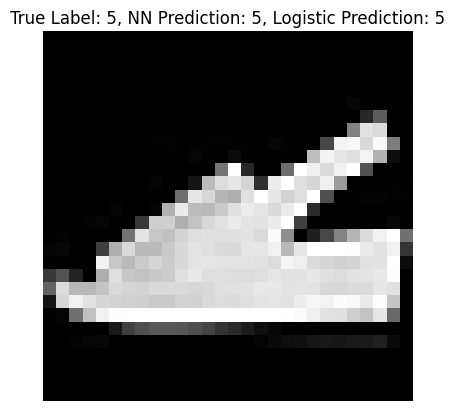

In [4]:

# Choose a random image from test dataset
index = np.random.randint(0, len(test_images))
image = test_images[index].reshape((28, 28))  # Reshape to 28x28
true_label = np.argmax(test_labels[index])

# Predict using the neural network model
nn_prediction = np.argmax(model.predict(np.expand_dims(test_images[index], axis=0)))

# Predict using the logistic regression model
logistic_prediction = np.argmax(logistic_model.predict(np.expand_dims(test_images[index], axis=0)))

plt.imshow(image, cmap='gray')
plt.title(f"True Label: {true_label}, NN Prediction: {nn_prediction}, Logistic Prediction: {logistic_prediction}")
plt.axis('off')
plt.show()